# **Object oriented programming** - Population, locus and generations exercise

This problem is designed in that way:

- **Population** of 100 individuals
- Each individual has **3 Locus**
- Each locus is defined by one between **2 possible alleles** , ex: 'A' or 'a'
- Each allele has its own **fitness**

Example:
- Population of 50 individuals = [ind0,ind1, ind2, ind3, ind4, ind5, ..., ind49]
- ind1 = 'locus1, locus2, locus3' = 'AbC'
- Locus1 = 'A' (in that case) but it could be 'A' or 'a'
- fitness('A') = 1
- fitness('a') = 0.78

Objectives:
- Simulate a RANDOM SELECTION event -> at each generation the individuals are removed if their fitness is lower than a random number between 0 and 1
- Simulate a REPRODUCTION event -> at each generation the remaining individuals from the random selection mate to give life to new offspring. Each new individual will have a random genotype whose alleles will be randomly chosen from those present in the population.
- Combine the RANDOM SELECTION event with the REPRODUCTION -> in order to mantain a population of 100 individuals but with a different proportion of the alleles with the respect of the previous generation population
- Write a "csv" file all the frequencies for each locus in the population and VISUALIZE the changes with a graphical representation

In [3]:
import random
import os

In [4]:
#Define the "Allele" class
# Ex. "A", fitness("A") = 1
class Allele(object):
    def __init__(self, name, fitness):
        self.name=name
        self.fitness=fitness

In [5]:
#Define the "Locus" class
# A locus can have 2 possible values, ex: "A" or "a"
class Locus(object):
    def __init__(self, name):
        self.name=name
        self.alleles=[] #Values of a locus

    def add_alleles(self, allele1, allele2): #add the possible values a locus can have
        self.alleles.append(allele1)
        self.alleles.append(allele2)

    def reset(self):
        # Reset alleles to an empty list; if you had other attributes that need resetting, include them here.
        self.alleles = []

    def get_random_allele(self): #decide which among the possible values choose as the allele of that locus
        return random.choice(self.alleles)

In [6]:
#Define the "Individual" class
#An individual has 3 loci
class Individual(object):

    def __init__(self, alleles):
        self.alleles = alleles #Here we store the list of alleles, one for each locus
        
    def get_genotype(self): #Return the genotype, namely the values of the 3 locus
        genotype=''
        for allele in self.alleles:
            genotype=genotype + str(allele.name)
        return genotype
        
    def get_fitness(self): #Return the fitness given the genotype
        fitness=1
        for allele in self.alleles:
            fitness *= allele.fitness
        return round(fitness,2)

In [7]:
#Decide what are the fitness and the possible alleles for every locus
locus1=Locus('locus1')
locus1.add_alleles(Allele('A', 1), Allele('a', 0.94))

locus2=Locus('locus2')
locus2.add_alleles(Allele('B', 1), Allele('b', 0.76))

locus3=Locus('locus3')
locus3.add_alleles(Allele('C', 1), Allele('c', 0.81))

#store all the locus with their respective alleles + fitness in a list
all_loci=[locus1, locus2, locus3]

In [8]:
#Function for creating an individual given the list of all possible locus in a loci
def create_individual(loci):
    alleles_for_individual = []
    for locus in loci:
        alleles_for_individual.append(locus.get_random_allele())
    i = Individual(alleles_for_individual)
    return i

In [9]:
#Iterate the "create_individual" how many times you want and store the individuals in a list
def create_population(size, loci):
    all_individuals=[]
    for i in range(size):
        all_individuals.append(create_individual(loci))
    return all_individuals
my_population=create_population(100, all_loci)

In [10]:
#Show the genotypes of all the individuals in a population
for ind in my_population:
    print(ind.get_genotype(), " ", end="")

aBc  aBc  ABC  AbC  ABc  abc  ABC  abC  ABC  aBC  aBC  ABC  abC  aBC  abC  aBc  AbC  Abc  aBC  abC  ABc  abc  abC  Abc  aBc  AbC  AbC  AbC  abC  ABC  ABc  aBc  aBc  AbC  Abc  ABC  aBC  aBc  Abc  ABC  ABC  aBc  Abc  AbC  AbC  ABC  Abc  ABC  ABc  ABC  abC  abC  aBc  ABc  AbC  abc  abC  AbC  Abc  AbC  Abc  ABc  abc  AbC  ABc  ABC  ABc  abC  Abc  ABC  Abc  aBc  aBc  ABc  abc  aBc  AbC  Abc  ABC  abC  aBc  ABc  aBc  abc  abC  abC  abc  abc  ABc  AbC  AbC  aBc  aBc  AbC  ABC  abC  ABC  ABc  AbC  AbC  

In [11]:
#Show the fitness of all the individuals in a population
for ind in my_population:
    print(ind.get_fitness(), " ", end="")

0.76  0.76  1  0.76  0.81  0.58  1  0.71  1  0.94  0.94  1  0.71  0.94  0.71  0.76  0.76  0.62  0.94  0.71  0.81  0.58  0.71  0.62  0.76  0.76  0.76  0.76  0.71  1  0.81  0.76  0.76  0.76  0.62  1  0.94  0.76  0.62  1  1  0.76  0.62  0.76  0.76  1  0.62  1  0.81  1  0.71  0.71  0.76  0.81  0.76  0.58  0.71  0.76  0.62  0.76  0.62  0.81  0.58  0.76  0.81  1  0.81  0.71  0.62  1  0.62  0.76  0.76  0.81  0.58  0.76  0.76  0.62  1  0.71  0.76  0.81  0.76  0.58  0.71  0.71  0.58  0.58  0.81  0.76  0.76  0.76  0.76  0.76  1  0.71  1  0.81  0.76  0.76  

In [12]:
#Combine fitness and genotypes together
myset=set()
for ind in my_population:
    myset.add((ind.get_genotype(), ind.get_fitness()))
    #print(f'("{ind.get_genotype()}", {ind.get_fitness()})') -> Useless since it prints duplicates
print(myset)

{('abC', 0.71), ('abc', 0.58), ('aBC', 0.94), ('ABc', 0.81), ('ABC', 1), ('aBc', 0.76), ('AbC', 0.76), ('Abc', 0.62)}


In [13]:
#Compute the frequency of a single allele in a given population
def get_allele_frequency(population, allele):
    count=0
    for ind in population: #selecting individuals from the population
        for al in ind.alleles: #selecting allele (al) from the individual alleles
            #print("Allele da cercare:" ,allele)
            #print("Allele da comparare:", al.name)
            if allele in al.name: #checking the presence of "allele" among the alleles of the individual
                count +=1
    return count/len(population) #return the frequency of the allele according to the size of the population

In [14]:
#Printing the frequency of all the alleles in a given population
def summarize_population_alleles(all_loci,population):
    freq=[]
    for locus in all_loci:
        for allele in locus.alleles:
            freq.append(get_allele_frequency(population, str(allele.name)))
            print(f'"{allele.name}" -> {get_allele_frequency(population, str(allele.name))}') 

In [15]:
# "all_loci" -> list of all the loci in the population of our interest
# "my_population" -> population of individuals (Individual class) each one associated with 3 locus
summarize_population_alleles(all_loci, my_population)

"A" -> 0.57
"a" -> 0.43
"B" -> 0.49
"b" -> 0.51
"C" -> 0.53
"c" -> 0.47


In [16]:
#Function for the RANDOM SELECTION event
#discard individuals if their fitness is lower than a random number
def single_generation(population):
    for individual in population: 
        if random.random() > individual.get_fitness():
            population.remove(individual)

In [17]:
summarize_population_alleles(all_loci, my_population)
print()

#10 events of random selection 
for i in range(10):
    print('at generation ' + str(i))
    print('population size is ' + str(len(my_population)))
    single_generation(my_population)

print()
summarize_population_alleles(all_loci, my_population)

"A" -> 0.57
"a" -> 0.43
"B" -> 0.49
"b" -> 0.51
"C" -> 0.53
"c" -> 0.47

at generation 0
population size is 100
at generation 1
population size is 78
at generation 2
population size is 65
at generation 3
population size is 53
at generation 4
population size is 44
at generation 5
population size is 41
at generation 6
population size is 35
at generation 7
population size is 30
at generation 8
population size is 29
at generation 9
population size is 27

"A" -> 0.76
"a" -> 0.24
"B" -> 0.92
"b" -> 0.08
"C" -> 0.8
"c" -> 0.2


Observe that the frequency of the less fit alleles decreases

In [19]:
def individual_from_population(population, loci):
    #Get the list of all the alleles in the population
    all_loci_new=[]
    for ind in population:
        for allele in ind.alleles:
            if allele.name not in all_loci_new:
                all_loci_new.append(allele.name)
    #Remove from the initial loci list the alleles that are not present in the population
    for locus in loci:
        for allele in locus.alleles:
            if allele.name not in all_loci_new:
                locus.alleles.remove(allele)
    population.append(create_individual(loci))

In [20]:
individual_from_population(my_population, all_loci)
print(f'Size of the population: {len(my_population)}')
summarize_population_alleles(all_loci, my_population)

Size of the population: 26
"A" -> 0.7307692307692307
"a" -> 0.2692307692307692
"B" -> 0.9230769230769231
"b" -> 0.07692307692307693
"C" -> 0.8076923076923077
"c" -> 0.19230769230769232


- Now we combine the RANDOM SELECTION event with the REPRODUCTION in order to mantain a population of 100 individuals but with different alleles proportion

- First, reinitialize the population

In [22]:
#Reinitialize the population
my_population=create_population(100, all_loci)
print(f'Size of the population: {len(my_population)}')
summarize_population_alleles(all_loci, my_population)

Size of the population: 100
"A" -> 0.58
"a" -> 0.42
"B" -> 0.55
"b" -> 0.45
"C" -> 0.6
"c" -> 0.4


In 1 generation we are going to have 2 kind of events
- **Random Selection** (remove individuals from the population)
- **Reproduction** (add individuals to the population)

At the end we want the number of individual in a population to be the same, namely 100.
Only the frequencies of the alleles will change

In [24]:
#Function to represent both "Random Selection" and "Reproduction"
def single_generation_complete(population,all_loci):
    for individual in population: 
        if random.random() > individual.get_fitness(): #Random selection
            population.remove(individual) 
    size=len(population)
    for _ in range(100-size): #Mantain size of the population to 100 individuals
        individual_from_population(population,all_loci) #Reproduction
    summarize_population_alleles(all_loci, population) #Print the frequencies of the alleles of the new generation

- Adapt everything to be written in a file

In [26]:
#Same as "summarize_population_alleles" but modified for storing the result
def summarize_population_alleles_file(all_loci,population):
    freq=[]
    for locus in all_loci:
        for allele in locus.alleles:
            freq.append(get_allele_frequency(population, str(allele.name)))
    return freq

In [27]:
#Same as "single_generation_complete" but modified to store the result into a file
def single_generation_complete_file(population,all_loci, file_name):
    for individual in population: 
        if random.random() > individual.get_fitness():
            population.remove(individual)
    size=len(population)
    for _ in range(100-size):
        individual_from_population(population,all_loci)
    freq=summarize_population_alleles_file(all_loci, population)
    with open(file_name, "a") as f:
        new_line=', '.join(str(x) for x in freq)
        f.write("\n" + new_line)

In [28]:
#Store all the alleles within a population in a file, written using "csv" format
def summarize_alleles_header(loci, file_name):
    locus_in_loci=[]
    for locus in loci:
            for allele in locus.alleles:
                if allele.name not in locus_in_loci:
                    locus_in_loci.append(allele.name)
    with open(file_name, "w") as f:
        f.write(', '.join(x for x in locus_in_loci))

In [29]:
#Define the file name and file name txt version
file_name="alleles_freq"
file_name_txt=file_name + ".txt"

In [30]:
summarize_alleles_header(all_loci, file_name_txt) #Initialize the file with headers (alleles in the population)
number_of_generation=50 #Define number of generations

#Run the simulation of event in a generation, "number_of_generations" times and store results in a file
for i in range(number_of_generation):
    single_generation_complete_file(my_population,all_loci, file_name_txt)

- Convert to a csv file

In [32]:
import csv

In [33]:
delimiter_in_txt = ', '
with open(file_name_txt, 'r') as txt_file, open(file_name +'.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    for line in txt_file:
        # Remove any extra whitespace or newline characters and split the line by the delimiter
        row = line.strip().split(delimiter_in_txt)
        writer.writerow(row)

### GRAPHICAL REPRESENTATION

In [35]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [36]:
df=pd.read_csv(file_name + '.csv')
df.describe()

,A,a,B,b,C,c
count,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000
mean,0.660000,0.340000,0.82500,0.17500,0.797400,0.202600
std,0.062073,0.062073,0.09526,0.09526,0.086657,0.086657
min,0.550000,0.250000,0.58000,0.07000,0.590000,0.090000
25%,0.610000,0.290000,0.80250,0.10250,0.720000,0.140000
50%,0.665000,0.335000,0.85500,0.14500,0.840000,0.160000
75%,0.710000,0.390000,0.89750,0.19750,0.860000,0.280000
max,0.750000,0.450000,0.93000,0.42000,0.910000,0.410000


In [37]:
df.shape

(50, 6)

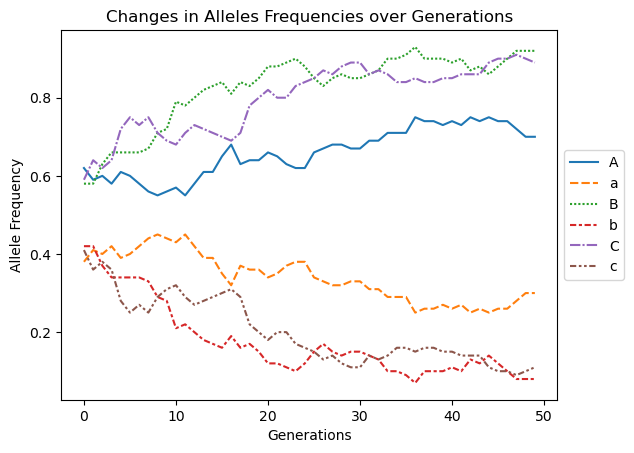

In [38]:
ax=sns.lineplot(df, dashes=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Generations")
plt.ylabel("Allele Frequency")
plt.title("Changes in Alleles Frequencies over Generations")
plt.show()

### Define a PIPELINE

In [40]:
def locus_initialization(number,al1, al2,fit1,fit2):
    locus_name = "locus" + str(number)
    locus=Locus(locus_name)
    locus.reset()
    locus.add_alleles(Allele(al1,fit1), Allele(al2,fit2))
    return locus

In [41]:
#Function for initialize the loci
def loci_initialization(allele_names):
    loci=[]
    for i, allele in enumerate(allele_names):
        al1 = allele
        fit1 = 1
        al2 = allele.lower()
        fit2 = round(random.choice(range(60,101))/100,2)
        locus=locus_initialization(i+1,al1,al2,fit1,fit2)
        loci.append(locus)
    return loci

In [94]:
#Function to convert a txt file into a csv one
def csv_converter(file_name, file_name_txt):
    delimiter_in_txt = ', '
    with open(file_name_txt, 'r') as txt_file, open(file_name +'.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for line in txt_file:
            row = line.strip().split(delimiter_in_txt)
            writer.writerow(row)

In [96]:
#Function to create the graoh
def graph(file_name):
    df=pd.read_csv(file_name + '.csv')
    ax=sns.lineplot(df, dashes=True)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel("Generations")
    plt.ylabel("Allele Frequency")
    plt.title("Changes in Alleles Frequencies over Generations")
    plt.show()

In [98]:
#function to print the genotype of the individuals of the population
def print_genofit(population):
    myset=set()
    for ind in population:
        myset.add((ind.get_genotype(), ind.get_fitness()))
    print(myset)

In [100]:
def pipeline(allele_names, number_of_generations, file_name, file_name_txt):
    all_loci=loci_initialization(allele_names)
    my_population=[]
    my_population=create_population(100, all_loci)
    print(f'Size of the population: {len(my_population)}')
    summarize_population_alleles(all_loci, my_population)
    summarize_alleles_header(all_loci, file_name_txt) 
    for i in range(number_of_generations):
        single_generation_complete_file(my_population,all_loci,file_name_txt)
    csv_converter(file_name, file_name_txt)
    graph(file_name)

Size of the population: 100
"A" -> 0.43
"a" -> 0.57
"B" -> 0.53
"b" -> 0.47
"C" -> 0.48
"c" -> 0.52
"D" -> 0.54
"d" -> 0.46


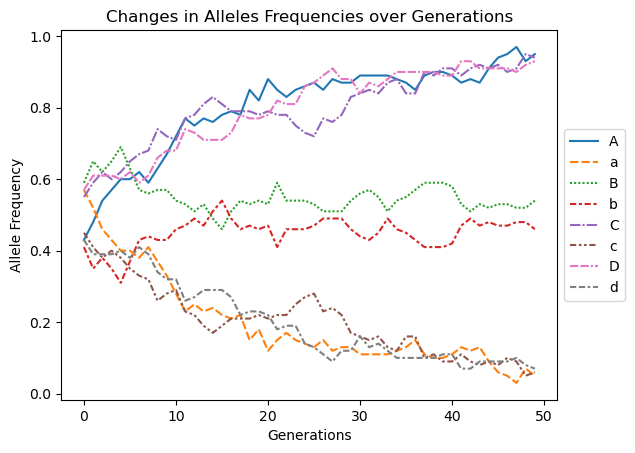

In [102]:
pipeline(['A','B','C', 'D'], 50, "alleles_freq", "alleles_freq.txt")